=== 1.1 Comprensión inicial del dataset ===

Dimensiones del dataset: (253680, 22)
Número de registros: 253680
Número de variables: 22

Tipos de datos:
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Estadísticas descriptivas:
                         count       mean       std   min   25%   50%   75%  \
Diabetes_012          2

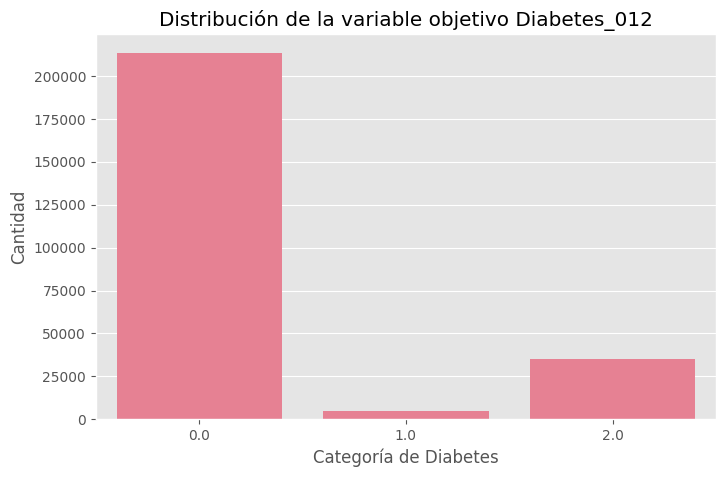


=== 1.2 Análisis de valores nulos y duplicados ===

Valores nulos por columna:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Número de duplicados exactos: 23899
Se eliminaron 23899 registros duplicados.
Nuevo shape del dataset: (229781, 22)

Número de duplicados parciales (mismos features pero diferente clase): 3707

Ejemplos de duplicados parciales:
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
36786            1.0     0.0   

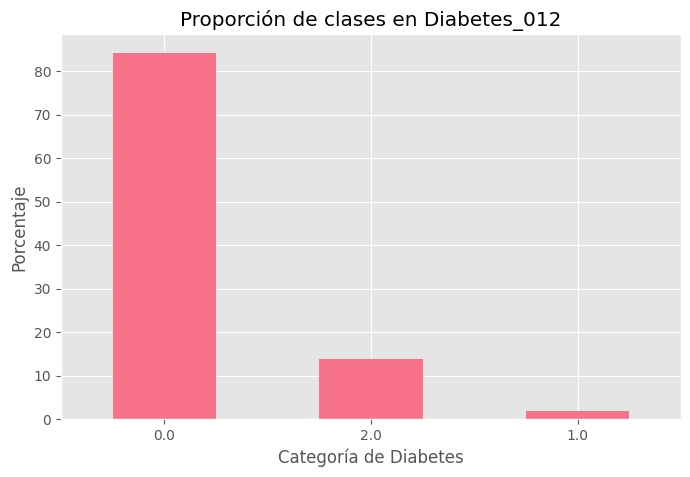


=== 1.4 Análisis univariado ===

Distribución de variables categóricas binarias:


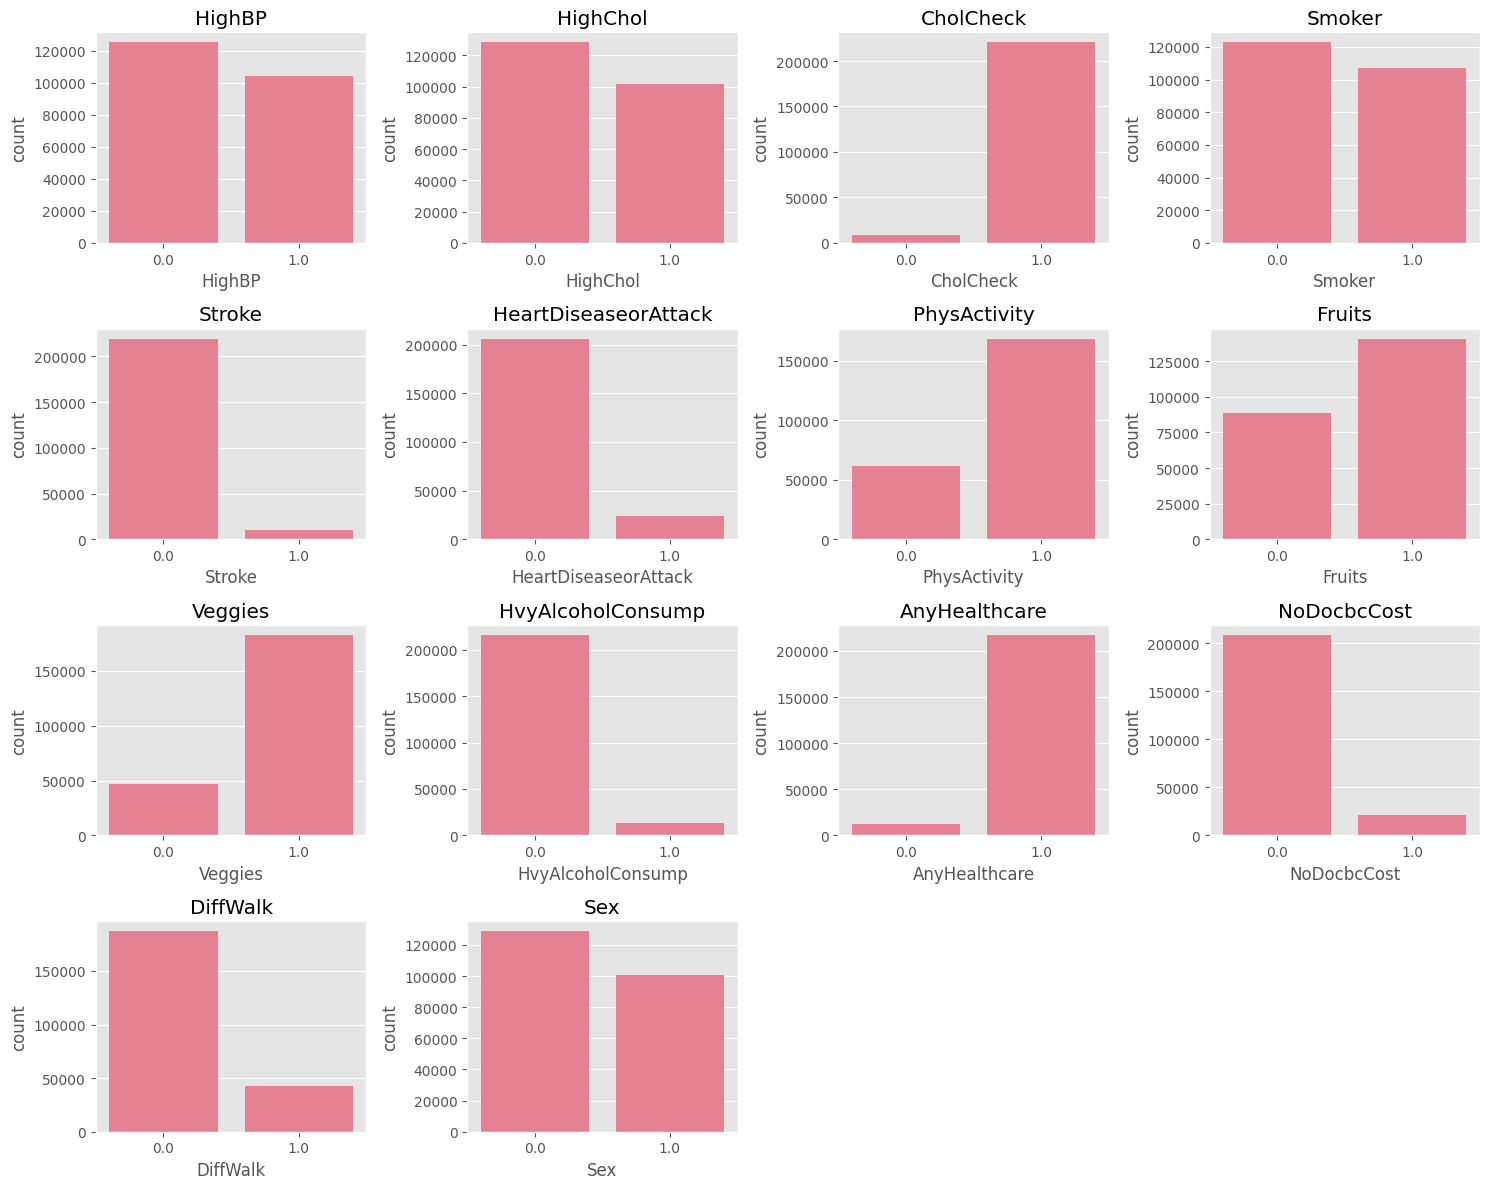


Distribución de variables continuas:


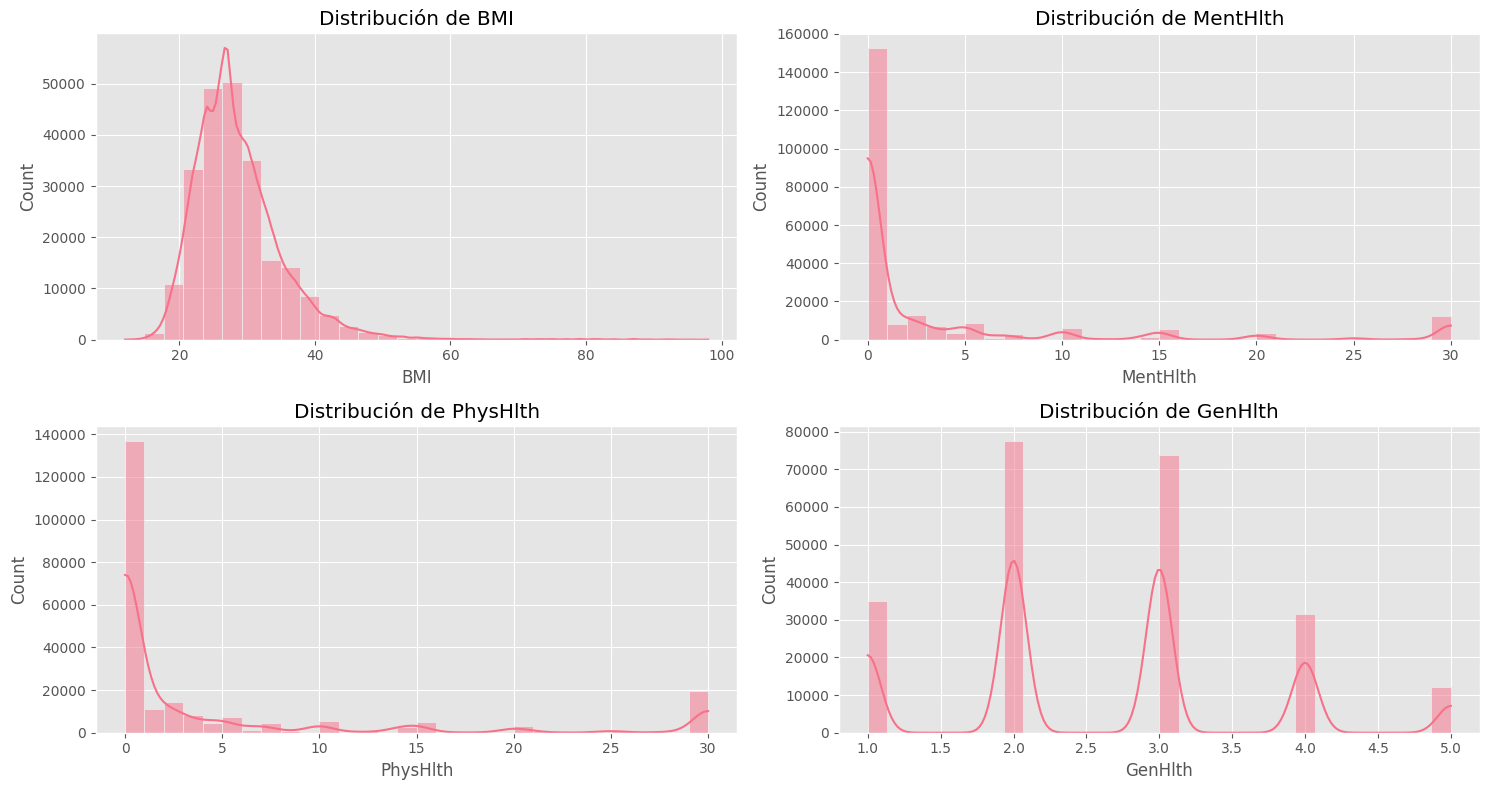


Análisis de outliers en BMI:


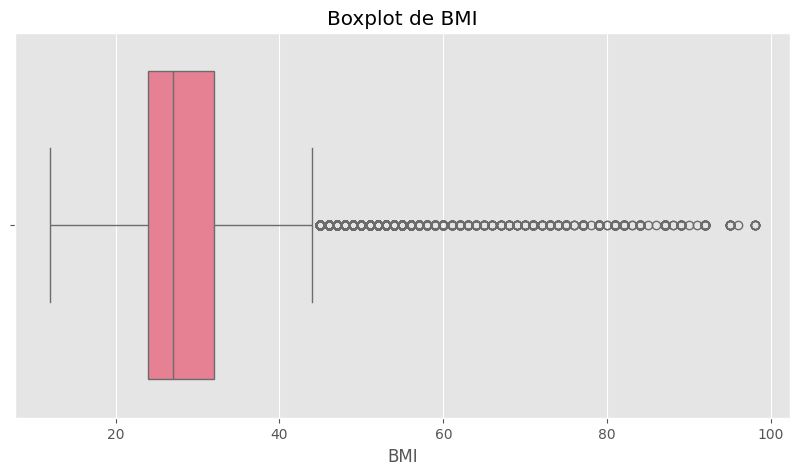

Número de outliers en BMI (IQR method): 5638
Porcentaje de outliers: 2.45%

=== 1.5 Análisis bivariado ===

Matriz de correlación:


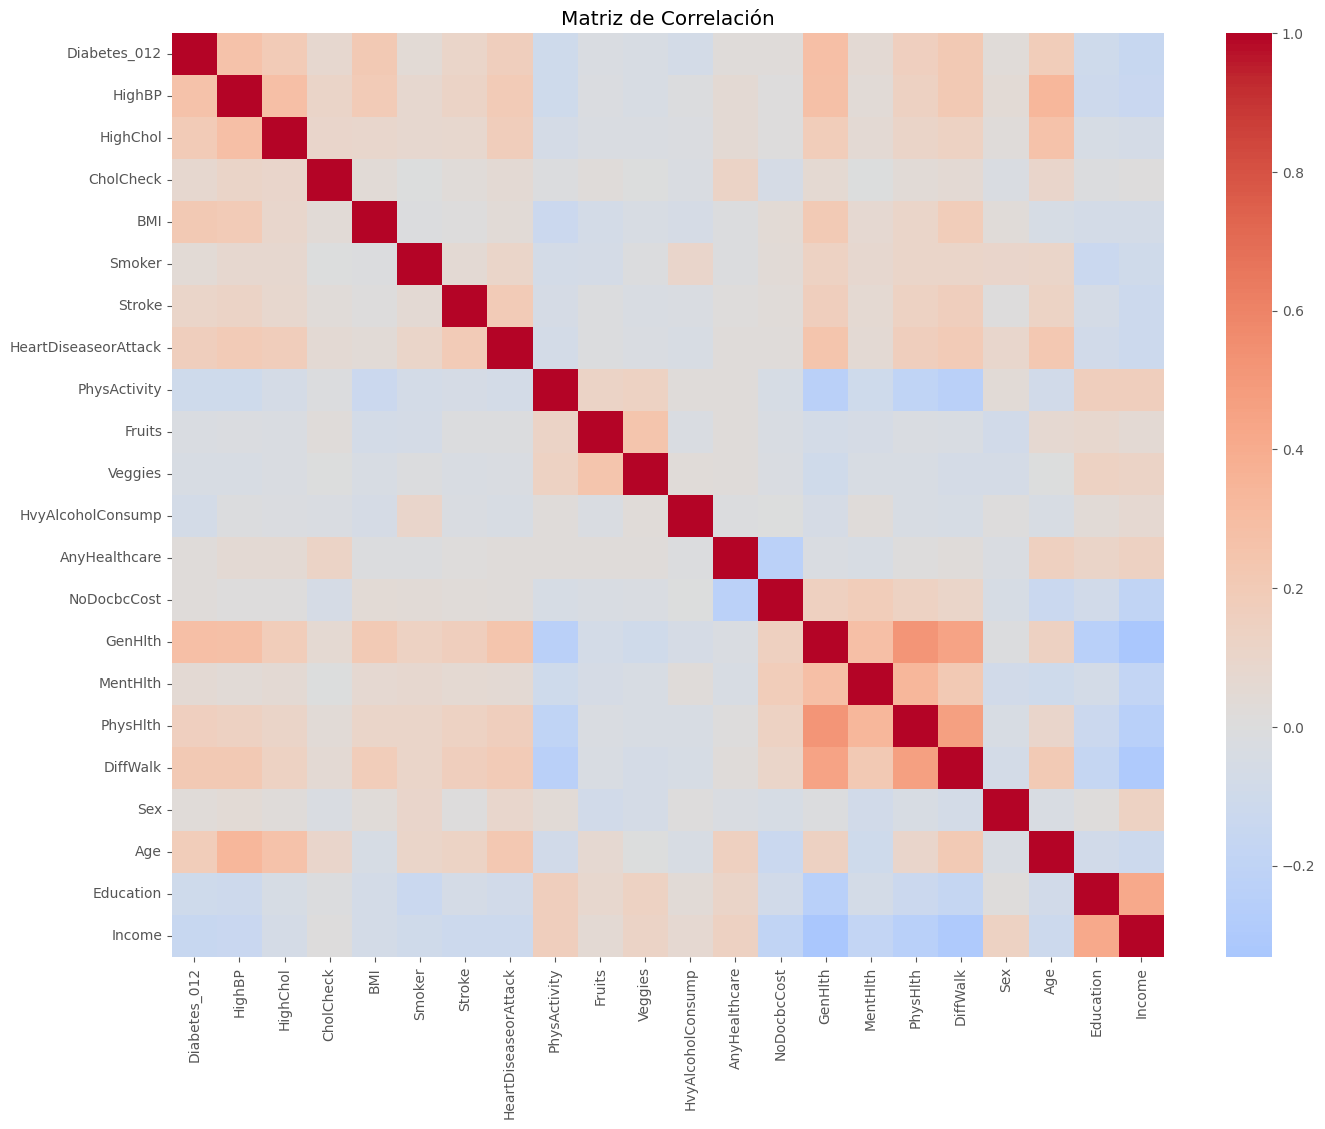


Correlación con Diabetes_012:
Diabetes_012            1.000000
GenHlth                 0.284881
HighBP                  0.261976
BMI                     0.212027
DiffWalk                0.210638
HighChol                0.203327
Age                     0.184642
HeartDiseaseorAttack    0.170816
PhysHlth                0.160485
Stroke                  0.100276
CholCheck               0.075701
MentHlth                0.057698
Smoker                  0.046774
Sex                     0.032243
AnyHealthcare           0.024911
NoDocbcCost             0.023568
Fruits                 -0.025462
Veggies                -0.043446
HvyAlcoholConsump      -0.067164
PhysActivity           -0.103408
Education              -0.107742
Income                 -0.147102
Name: Diabetes_012, dtype: float64

Relación entre features importantes y Diabetes_012:


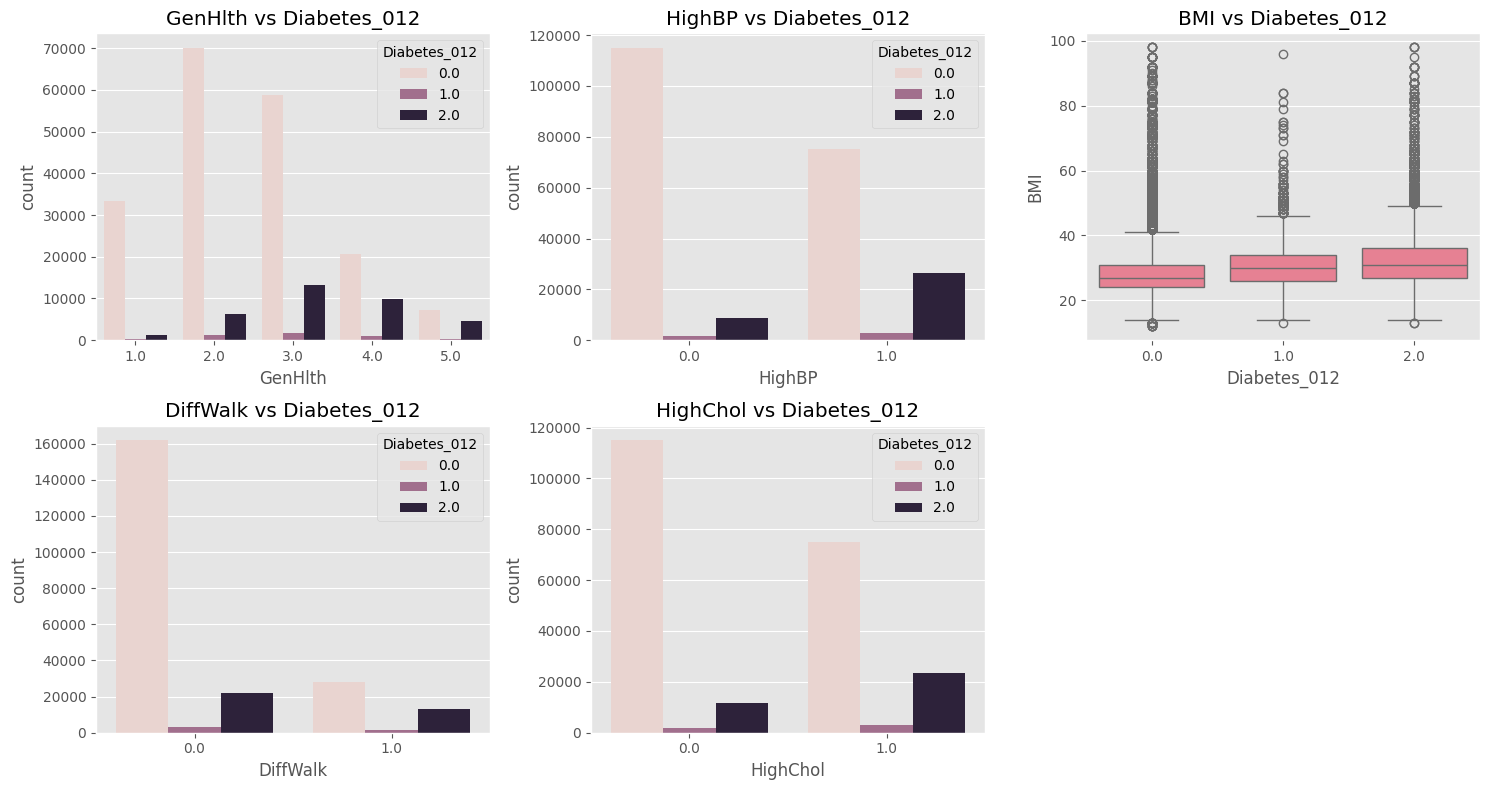


ANOVA para variables categóricas vs Diabetes_012:
HighBP: F-value = 16932.13, p-value = 0.0000
HighChol: F-value = 9909.19, p-value = 0.0000
Smoker: F-value = 503.82, p-value = 0.0000
Stroke: F-value = 2333.94, p-value = 0.0000
HeartDiseaseorAttack: F-value = 6906.04, p-value = 0.0000
Sex: F-value = 239.13, p-value = 0.0000

=== 1.6 Análisis multivariado ===

Análisis PCA:


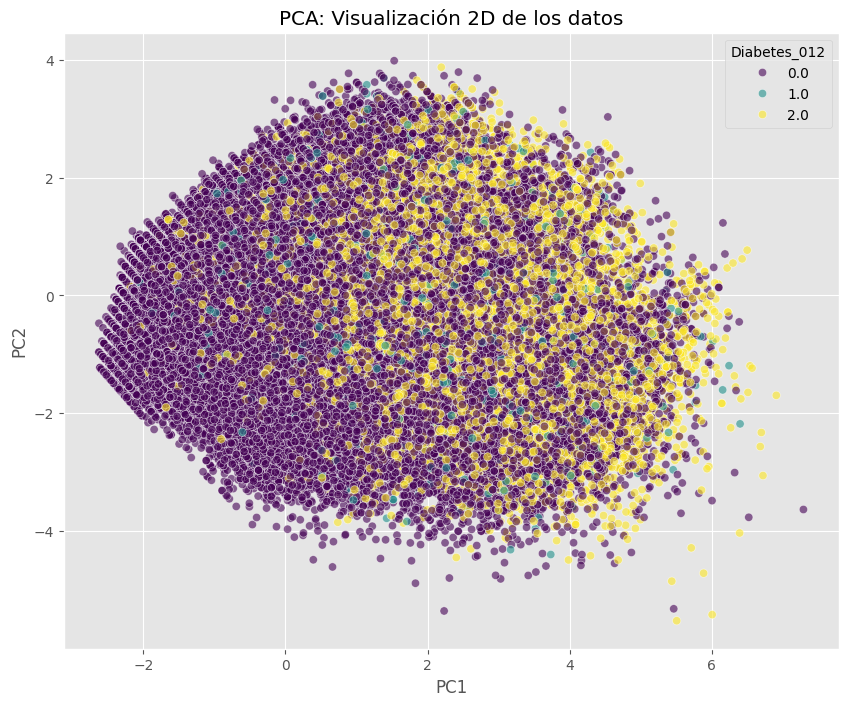

Varianza explicada por los componentes: [0.31541835 0.16918812]

Pairplot para variables seleccionadas:


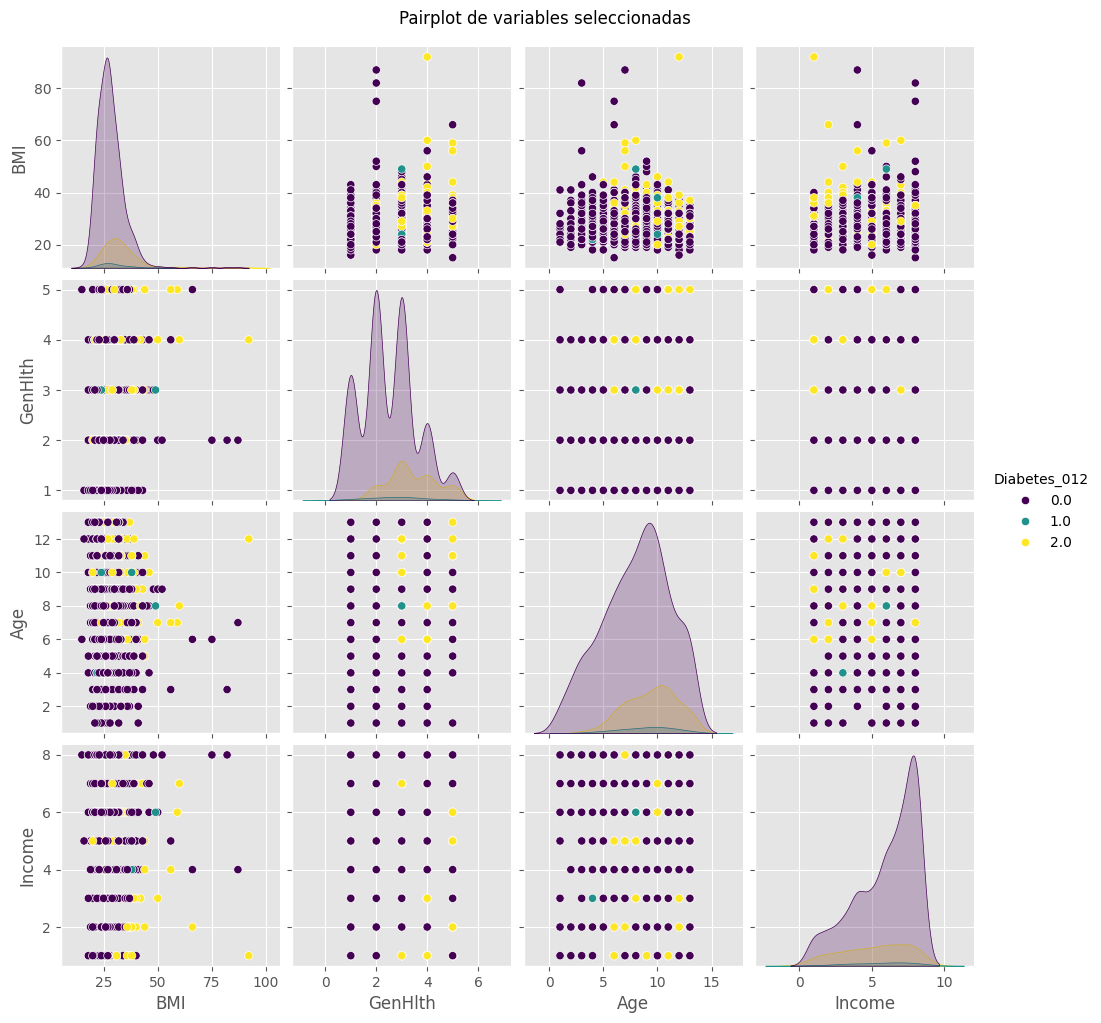

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px

# Configuración inicial
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
sns.set_palette("husl")

# 1.1 Comprensión inicial del dataset
def initial_exploration(df):
    print("=== 1.1 Comprensión inicial del dataset ===")
    
    # Dimensiones del dataset
    print(f"\nDimensiones del dataset: {df.shape}")
    print(f"Número de registros: {df.shape[0]}")
    print(f"Número de variables: {df.shape[1]}")
    
    # Tipos de datos
    print("\nTipos de datos:")
    print(df.dtypes)
    
    # Estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe().T)
    
    # Distribución de la variable objetivo
    print("\nDistribución de Diabetes_012:")
    dist = df['Diabetes_012'].value_counts(normalize=True) * 100
    print(dist)
    
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Diabetes_012', data=df)
    plt.title('Distribución de la variable objetivo Diabetes_012')
    plt.xlabel('Categoría de Diabetes')
    plt.ylabel('Cantidad')
    plt.show()
    
    return dist

# 1.2 Análisis de valores nulos y duplicados
def missing_duplicates_analysis(df):
    print("\n=== 1.2 Análisis de valores nulos y duplicados ===")
    
    # Valores nulos
    print("\nValores nulos por columna:")
    print(df.isnull().sum())
    
    # Duplicados exactos
    duplicates = df.duplicated().sum()
    print(f"\nNúmero de duplicados exactos: {duplicates}")
    
    if duplicates > 0:
        df.drop_duplicates(inplace=True)
        print(f"Se eliminaron {duplicates} registros duplicados.")
        print(f"Nuevo shape del dataset: {df.shape}")
    
    # Duplicados parciales (mismos features pero diferente clase)
    features = df.columns.drop('Diabetes_012')
    partial_duplicates = df.duplicated(subset=features, keep=False).sum()
    print(f"\nNúmero de duplicados parciales (mismos features pero diferente clase): {partial_duplicates}")
    
    if partial_duplicates > 0:
        # Mostrar algunos ejemplos
        dup_examples = df[df.duplicated(subset=features, keep=False)].sort_values(by=list(features))
        print("\nEjemplos de duplicados parciales:")
        print(dup_examples.head(6))
    
    return df

# 1.3 Análisis de desbalanceo de clases
def class_imbalance_analysis(target_dist):
    print("\n=== 1.3 Análisis de desbalanceo de clases ===")
    
    print("\nProporción de clases:")
    print(target_dist)
    
    plt.figure(figsize=(8, 5))
    target_dist.plot(kind='bar')
    plt.title('Proporción de clases en Diabetes_012')
    plt.xlabel('Categoría de Diabetes')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=0)
    plt.show()

# 1.4 Análisis univariado
def univariate_analysis(df):
    print("\n=== 1.4 Análisis univariado ===")
    
    # Variables categóricas binarias
    binary_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                   'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                   'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
    
    print("\nDistribución de variables categóricas binarias:")
    plt.figure(figsize=(15, 12))
    for i, var in enumerate(binary_vars, 1):
        plt.subplot(4, 4, i)
        sns.countplot(x=var, data=df)
        plt.title(var)
    plt.tight_layout()
    plt.show()
    
    # Variables continuas
    continuous_vars = ['BMI', 'MentHlth', 'PhysHlth', 'GenHlth']
    
    print("\nDistribución de variables continuas:")
    plt.figure(figsize=(15, 8))
    for i, var in enumerate(continuous_vars, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[var], kde=True, bins=30)
        plt.title(f'Distribución de {var}')
    plt.tight_layout()
    plt.show()
    
    # Outliers en BMI
    print("\nAnálisis de outliers en BMI:")
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['BMI'])
    plt.title('Boxplot de BMI')
    plt.show()
    
    # Detección cuantitativa de outliers
    Q1 = df['BMI'].quantile(0.25)
    Q3 = df['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
    print(f"Número de outliers en BMI (IQR method): {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers)/len(df)*100:.2f}%")

# 1.5 Análisis bivariado
def bivariate_analysis(df):
    print("\n=== 1.5 Análisis bivariado ===")
    
    # Matriz de correlación
    print("\nMatriz de correlación:")
    corr_matrix = df.corr()
    
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')
    plt.show()
    
    # Correlación con la variable objetivo
    print("\nCorrelación con Diabetes_012:")
    print(corr_matrix['Diabetes_012'].sort_values(ascending=False))
    
    # Relación entre variables importantes y la variable objetivo
    top_features = corr_matrix['Diabetes_012'].abs().sort_values(ascending=False).index[1:6]
    
    print("\nRelación entre features importantes y Diabetes_012:")
    plt.figure(figsize=(15, 8))
    for i, var in enumerate(top_features, 1):
        plt.subplot(2, 3, i)
        if df[var].nunique() < 10:  # Variable categórica
            sns.countplot(x=var, hue='Diabetes_012', data=df)
        else:  # Variable continua
            sns.boxplot(x='Diabetes_012', y=var, data=df)
        plt.title(f'{var} vs Diabetes_012')
    plt.tight_layout()
    plt.show()
    
    # ANOVA para variables categóricas
    categorical_vars = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Sex']
    
    print("\nANOVA para variables categóricas vs Diabetes_012:")
    for var in categorical_vars:
        groups = [df[df[var] == val]['Diabetes_012'] for val in df[var].unique()]
        f_val, p_val = stats.f_oneway(*groups)
        print(f"{var}: F-value = {f_val:.2f}, p-value = {p_val:.4f}")

# 1.6 Análisis multivariado
def multivariate_analysis(df):
    print("\n=== 1.6 Análisis multivariado ===")
    
    # PCA para visualización
    print("\nAnálisis PCA:")
    
    # Seleccionar variables numéricas continuas
    numeric_vars = ['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']
    X = df[numeric_vars]
    X_scaled = StandardScaler().fit_transform(X)
    
    # Aplicar PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)
    
    # Crear DataFrame con los componentes
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Diabetes_012'] = df['Diabetes_012'].values
    
    # Visualizar
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Diabetes_012', data=pca_df, palette='viridis', alpha=0.6)
    plt.title('PCA: Visualización 2D de los datos')
    plt.show()
    
    # Varianza explicada
    print(f"Varianza explicada por los componentes: {pca.explained_variance_ratio_}")
    
    # Pairplot para relaciones interesantes
    print("\nPairplot para variables seleccionadas:")
    sample_df = df.sample(n=1000, random_state=42)  # Tomar muestra para no sobrecargar
    sns.pairplot(sample_df, vars=['BMI', 'GenHlth', 'Age', 'Income'], 
                 hue='Diabetes_012', diag_kind='kde', palette='viridis')
    plt.suptitle('Pairplot de variables seleccionadas', y=1.02)
    plt.show()

# Función principal para ejecutar todo el EDA
def run_full_eda(df_path):
    # Cargar datos
    df = pd.read_csv(df_path)
    
    # Ejecutar análisis
    target_dist = initial_exploration(df)
    df = missing_duplicates_analysis(df)
    class_imbalance_analysis(target_dist)
    univariate_analysis(df)
    bivariate_analysis(df)
    multivariate_analysis(df)
    
    return df

# Ejecutar el EDA completo
df = run_full_eda('../data/diabetes_012_health_indicators.csv')